In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import keras

In [2]:
train_gen = ImageDataGenerator(rescale=1./255)
images = np.load("images.npy")
labels = np.load("labels.npy")
labels = labels.reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)
train_gen.fit(x_train)
test_gen = ImageDataGenerator(rescale=1./255)
test_gen.fit(x_test)


In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(480,640,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
#model.add(Activation('sigmoid'))

model.compile(loss='mae',
              optimizer=keras.optimizers.Adam(lr=1e-6),
              metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 478, 638, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 478, 638, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 239, 319, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 237, 317, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 237, 317, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 158, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 596608)            0

In [4]:
model.fit_generator(train_gen.flow(x_train, y_train, batch_size=12), validation_data=test_gen.flow(x_test, y_test, batch_size=4), validation_steps=32, epochs=100)

D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
150/150 [==============================] - 38s 202ms/step - loss: 24.5453 - mse: 682.8593 - val_loss: 7.2957 - val_mse: 88.2280
Epoch 2/100
150/150 [==============================] - 27s 180ms/step - loss: 7.3158 - mse: 83.7418 - val_loss: 5.7544 - val_mse: 55.5514
Epoch 3/100
150/150 [==============================] - 27s 180ms/step - loss: 6.9754 - mse: 76.6208 - val_loss: 6.5996 - val_mse: 66.3875
Epoch 4/100
150/150 [==============================] - 27s 181ms/step - loss: 6.7554 - mse: 73.6098 - val_loss: 6.9304 - val_mse: 76.5462
Epoch 5/100
150/150 [==============================] - 27s 181ms/step - loss: 7.1922 - mse: 81.5756 - val_loss: 6.1435 - val_mse: 58.7912
Epoch 6/100
150/150 [==============================] - 27s 181ms/step - loss: 7.0075 - mse: 74.0799 - val_loss: 6.0873 - val_mse: 62.3561
Epoch 7/100
150/150 [==============================] - 27s 181ms/step - loss: 6.8560 - mse: 74.5545 - val_loss: 6.3372 - val_mse: 62.0133
Epoch 8/100
150/150 [===========

Epoch 60/100
150/150 [==============================] - 29s 193ms/step - loss: 5.0453 - mse: 40.4387 - val_loss: 4.5448 - val_mse: 33.1500
Epoch 61/100
150/150 [==============================] - 29s 195ms/step - loss: 5.3974 - mse: 46.8814 - val_loss: 4.3367 - val_mse: 31.8184
Epoch 62/100
150/150 [==============================] - 29s 194ms/step - loss: 5.1336 - mse: 41.7607 - val_loss: 4.3450 - val_mse: 29.7205
Epoch 63/100
150/150 [==============================] - 29s 193ms/step - loss: 5.2236 - mse: 43.9110 - val_loss: 4.8361 - val_mse: 38.8658
Epoch 64/100
150/150 [==============================] - 29s 193ms/step - loss: 5.1696 - mse: 42.4474 - val_loss: 4.1324 - val_mse: 28.6136
Epoch 65/100
150/150 [==============================] - 29s 193ms/step - loss: 5.1151 - mse: 41.9587 - val_loss: 4.2057 - val_mse: 28.6733
Epoch 66/100
150/150 [==============================] - 29s 194ms/step - loss: 5.0301 - mse: 40.4595 - val_loss: 3.9799 - val_mse: 28.2471
Epoch 67/100
150/150 [=====

In [5]:
model.save('crowd_count2.h5')

In [8]:
test_generator = test_gen.flow(x_test, y_test)
test_generator.reset()
all_labels = []
all_pred = []
for i in range(len(test_generator)):
    x = next(test_generator)
    pred_i = model.predict(x[0])[:,0]
    labels_i = x[1]
    print(pred_i)
    print(labels_i)
    all_labels.append(labels_i)
    all_pred.append(pred_i)

all_labels = np.concatenate(all_labels)
all_pred = np.concatenate(all_pred)

[25.707668 31.713137 30.586946 27.455986 35.73194  35.918125 34.678745
 27.561352 30.447775 28.126816 33.162247 29.705233 26.391975 30.514221
 35.960274 29.490135 33.828186 26.22399  22.4903   32.680225 24.696049
 32.47279  23.605692 27.571215 27.144897 34.293583 20.65748  34.578262
 27.228312 28.680841 29.876976 30.565207]
[24 30 31 22 40 37 44 30 36 26 37 34 27 38 48 30 36 27 18 35 25 34 21 24
 26 36 20 43 35 30 29 27]
[29.496935 34.981716 32.64972  30.365482 26.372574 27.716087 31.779835
 33.12254  25.850018 18.72654  33.70236  21.585075 29.641016 30.620518
 29.372032 28.003736 38.263233 37.656624 22.81642  25.631046 35.62875
 26.498896 31.378489 24.435043 23.980862 35.02301  36.58345  29.751646
 37.860146 29.654575 35.43     33.53514 ]
[29 41 36 24 28 24 32 33 21 17 46 23 29 29 31 25 39 46 22 21 42 30 34 28
 25 38 43 29 45 28 36 36]
[29.621733 31.055136 33.655407 24.023262 26.274147 28.263834 29.823872
 34.03319  27.937086 29.68349  30.447302 22.680525 29.095053 30.69984
 33.13983 

(15.144813162242546,
 50.710430810377815,
 18.040941979238315,
 53.606559627373585)

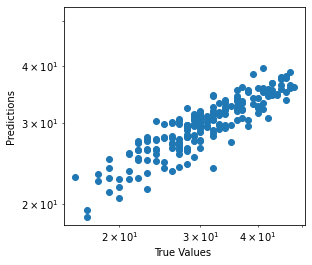

In [11]:
g=plt.scatter(all_labels, all_pred)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')
